<h1 align='center'> Análise Modal de um Modelo Quarter-Car </h1>

In [1]:
#Importando bibliotecas:
import numpy as np
from sympy import *
from sympy.integrals.heurisch import heurisch
import warnings
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 20

title = False 

#Exibição dos gráficos em no notebook:
%matplotlib inline

'''
#Exibição dos gráficos em janela externa:
%matplotlib qt
'''

# Inicializações importantes:
warnings.filterwarnings("ignore")
init_printing()

# Função de arredondar elemento da matriz:
def arredNUM(matrix):
    for a in preorder_traversal(matrix):
        if isinstance(a, Float):
            matrix = matrix.subs(a, round(a, 4))
    return matrix

<div align="center">
    <img src="images/qcmodel.png">
</div>

<h5 align='right'> (Jazar, 2017) - 3rd ed </h5>

$$[M]\ddot{[X]} + [C]\dot{[X]} + [K][X] = [F]$$

<h5 align='right'> Jazar - Eq. (11.46) </h5>

### Parâmetros do sistema:

In [2]:
# Unidades no S.I [Kg, N/m, (N*s)/m]:
# GDL não suspenso:
mu = 75
ku = 193000

# GDL suspenso:
ms = 375
ks = 35000
cs = 1800

### Excitação externa por perfil de pista:

##### Entrada Harmônica:

In [3]:
# Tempo de amostragem:
ts = 1e-2

# Tempo de simulação:
tf = 3

# Vetor de tempo:
time = np.arange(0, 500, ts)

### Definição das matrizes (Lagrange) e condições iniciais:

In [4]:
# Fator de correção para cálculos:
fc = 1e0

# Matriz das massas (Kg):
M = np.array([
    [mu, 0,],
    [0, ms]
], dtype=float)*fc

# Matriz de rigidez (N/m):
K = np.array([
    [(ks+ku), -ks],
    [-ks, ks]
], dtype=float)*fc

# Matriz de amortecimento (N*s/m):
C = np.array([
    [cs, -cs],
    [-cs, cs]
], dtype=float)*fc

# Matriz de F(x) (transposta):
F = np.array([0, 0]).T*fc

# Matriz de posições iniciais (transposta):
X0 = np.array([0.2, 0.1], dtype=float).T

# Matriz de velocidades iniciais (transposta):
V0 = np.array([0, 0], dtype=float).T

### $$\text{Obtenção de } [M]^{-1/2}:$$

In [5]:
MM = np.power(M, -1/2)  # Inverso da raíz quadrada

MM[MM == np.inf] = 0  # Transforma os elementos infinitos em zero

Matrix(MM.round(4))

⎡0.1155    0   ⎤
⎢              ⎥
⎣  0     0.0516⎦

### $$ \text{Cálculo da matriz } \tilde{[K]} = [M^{-1/2}][K][M^{-1/2}]:$$

In [6]:
K_til = MM@K@MM  # Cálculo da matriz K_til

Matrix(K_til.round(4))

⎡ 3040.0    -208.6997⎤
⎢                    ⎥
⎣-208.6997   93.3333 ⎦

### $$ \text{Cálculo da matriz } \tilde{[C]} = [M^{-1/2}][C][M^{-1/2}]:$$

In [7]:
try:
    C_til = MM@C@MM  # Cálculo da matriz C_til
except:
    C_til = np.zeros((len(M), len(M)))

Matrix(C_til.round(4))

⎡  24.0    -10.7331⎤
⎢                  ⎥
⎣-10.7331    4.8   ⎦

### $$\text{Obtendo os autovalores (} \lambda \text{) e autovetores normalizados (} P \text{) de }\tilde{[K]}:$$

In [8]:
# Obtenção dos autovalores e autovetores normalizados
lamb, P = np.linalg.eig(K_til)

##### $$\text{Matriz de autovalores }[\lambda]:$$

In [9]:
Matrix(lamb.round(4))

⎡3054.7079⎤
⎢         ⎥
⎣ 78.6254 ⎦

##### $$\text{Matriz de autovetores normalizados }[P]:$$

In [10]:
Matrix(P.round(4))

⎡0.9975   0.0703⎤
⎢               ⎥
⎣-0.0703  0.9975⎦

### Cálculo das frequências naturais: $$[\omega_n] = \left[ \sqrt{\lambda} \right]$$

In [11]:
omega_n = np.sqrt(lamb)  # Calcula a matriz de freqências naturais, em rad/s

Matrix(omega_n.round(4))

⎡55.2694⎤
⎢       ⎥
⎣8.8671 ⎦

### Mode Shapes: $$[u_i] = [M^{-1/2}][P_i]$$

In [12]:
U = (MM@P)  # Modos de vibrar: cada linha é um GDL e cada coluna representa um modo de vibrar

Matrix(U.round(4))

⎡0.1152   0.0081⎤
⎢               ⎥
⎣-0.0036  0.0515⎦

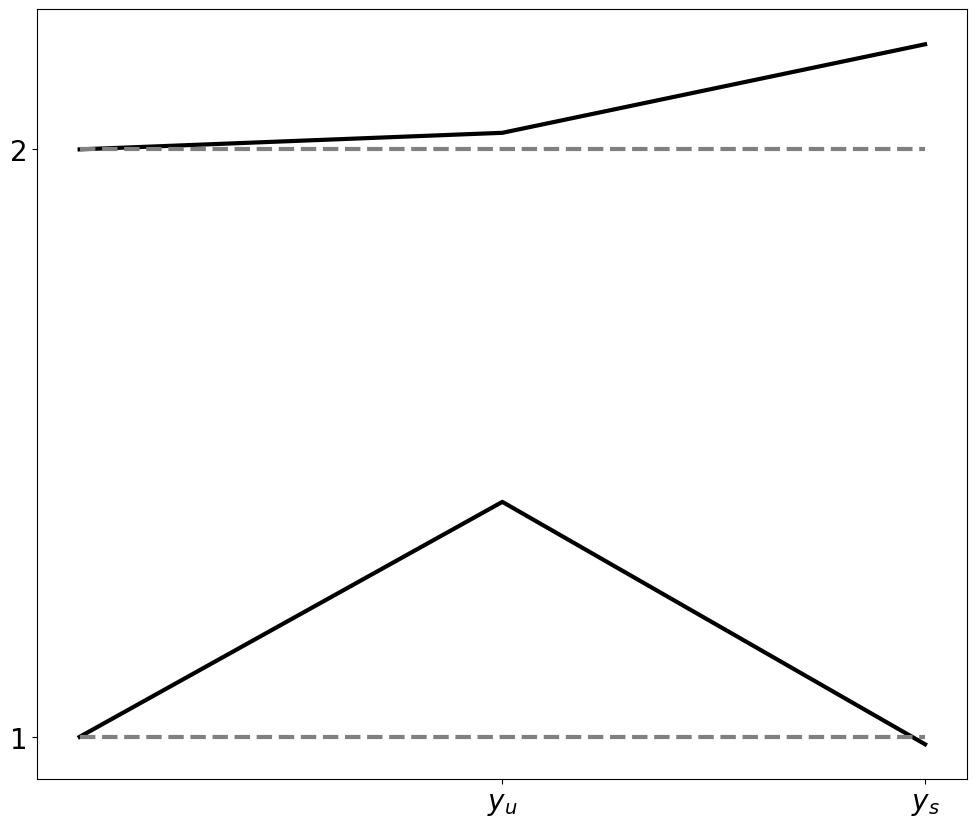

In [13]:
horizontal = False # Define o sentido de variação dos GDL's

# Plotando os gráficos:
plt.rcParams['figure.figsize'] = (12, 10)
plt.figure()

space = (np.max(np.abs(U))*2.5)

padding = []
for i in range(len(U)+1):
    padding.append(space*i)

vib = []
for i in range(len(U)):
    vib.append([(space*(i+1))])

for i in range(len(vib)):
    vib[i] = np.concatenate((vib[i], (vib[i][0]+U.T[i])))

if(horizontal):
    for i in range(len(U)):
        plt.plot(vib[i], padding, 'k')
        plt.plot((vib[i][0], vib[i][0]), (0, (space*len(U))), 'gray', linestyle='dashed')
    plt.xticks(padding[1:], range(1, len(U)+1))
    labels = []
    for i in range(1, len(U)+1):
        labels.append(f'$y_{i}$')
    plt.yticks(padding[1:], labels)
else:
    for i in range(len(U)):
        plt.plot(padding, vib[i], 'k')
        plt.plot((0, (space*len(U))), (vib[i][0], vib[i][0]), 'gray', linestyle='dashed')
    plt.yticks(padding[1:], range(1, len(U)+1))
    labels = ['$y_u$', '$y_s$']
    plt.xticks(padding[1:], labels)

if(title):
    plt.title('Mode Shapes')
plt.grid()
plt.savefig('curves/mode_shapes.eps', dpi=600, transparent=True, bbox_inches='tight')

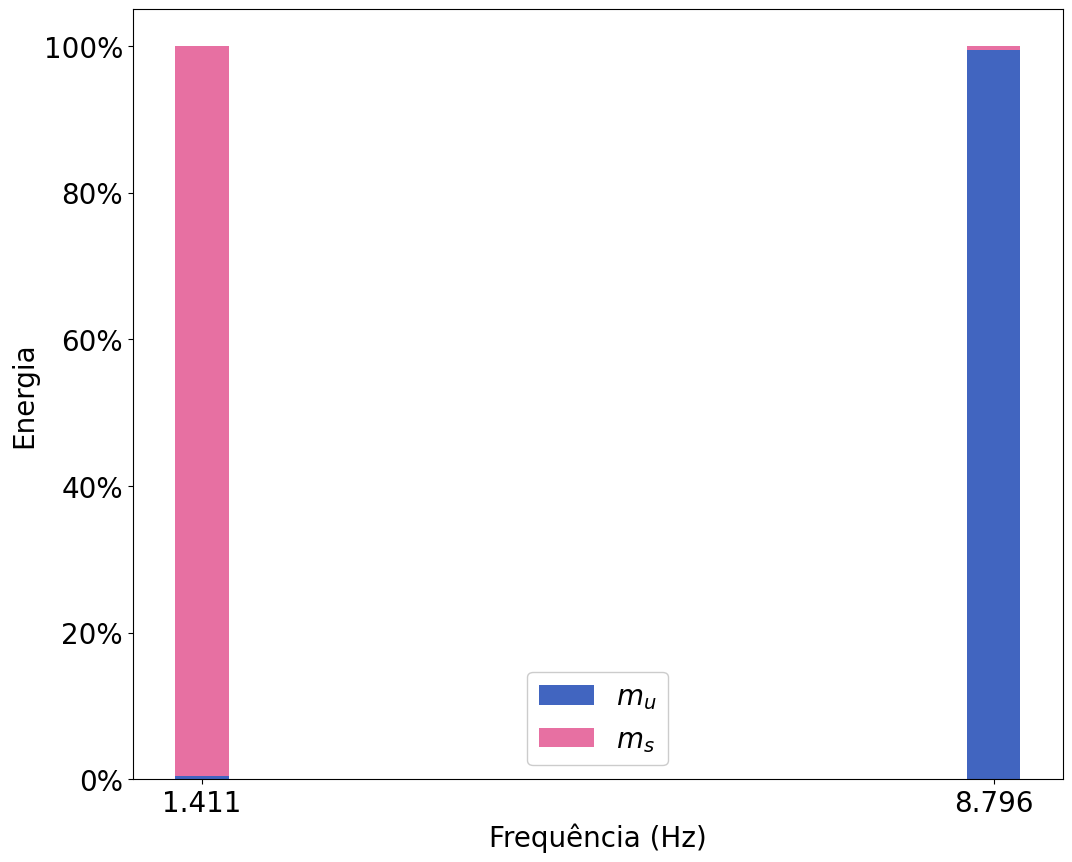

In [14]:
colors = ['C6', 'C1']

plt.rcParams['figure.figsize'] = (12, 10)
plt.figure()
for i in range(len(omega_n)):
    w = omega_n[i]/(2*np.pi)
    p = np.abs(P[:, i])**2

    for j in range(len(p)):
        plt.bar(w, p[j], bottom=np.sum(p[:j]), width=0.5, color=colors[j])


plt.xlabel('Frequência (Hz)')
plt.ylabel('Energia')

# y ticks in percentage
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x*100:.0f}%')
plt.legend(['$m_u$', '$m_s$'])

plt.xticks((omega_n/(2*np.pi)), np.round((omega_n/(2*np.pi)), 3))

if(title):
    plt.title('Energia dos Modos Ressonantes')
plt.grid()
plt.savefig('curves/energias_ressonancia.eps', dpi=600, transparent=True, bbox_inches='tight')

### $$\text{Cálculo da matriz } [S] = [M^{-1/2}][P]$$

In [15]:
S = MM@P  # Cálcula a matriz S

Matrix(S.round(4))

⎡0.1152   0.0081⎤
⎢               ⎥
⎣-0.0036  0.0515⎦

### $$\text{Cálculo da matriz } [\Lambda] = [P^T][\tilde{K}][P]$$

In [16]:
# Calcula a matriz LAMBDA, que deve ser igual à matriz diagonal contendo os autovalores
LAMB = P.T@K_til@P

Matrix(LAMB.round(4))

⎡3054.7079     0   ⎤
⎢                  ⎥
⎣    0      78.6254⎦

### $$\text{Cálculo da matriz } [\Gamma] = [P^T][\tilde{C}][P]$$

In [17]:
GAM = P.T@C_til@P  # Calcula a matriz GAMMA, que deve ser igual à matriz diagonal contendo os coeficientes de amortecimento em r -> 2*zeta*omega

Matrix(GAM.round(4))

⎡25.4104  -9.2806⎤
⎢                ⎥
⎣-9.2806  3.3896 ⎦

### $$\text{Determinando os coeficientes de amortecimento } \zeta_i:$$

In [18]:
try:
    Matrix(Z.round(4))
except:
    Z = np.zeros(len(M))
    for i in range(len(omega_n)):
        Z[i] = (GAM[i][i]/(2*np.sqrt(LAMB[i][i])))
Matrix(Z.round(4))

⎡0.2299⎤
⎢      ⎥
⎣0.1911⎦

### Cálculo das frequências amortecidas: $$[\omega_d] = \left[ \omega_n\sqrt{1-\zeta^2} \right]$$

In [19]:
# Calcula a matriz de freqências amortecidas, em rad/s
omega_d = omega_n*np.sqrt(1-np.power(Z, 2))

Matrix(omega_d.round(4))

⎡53.7893⎤
⎢       ⎥
⎣8.7036 ⎦

### $$\text{Cálculo da matriz } [\Pi] = [P^T][M^{-1/2}][F]$$

In [20]:
# Calcula a matriz PI, que deve ser igual à matriz coluna, contendo as componentes da força aplicada, distribuida nos GDL's
PI = Matrix(P.T@MM@F)

Matrix(arredNUM(PI))

⎡0⎤
⎢ ⎥
⎣0⎦

### Transformações de coordenadas das condições iniciais: $$[X_0], [V_0] ~~\rightarrow~~ [R_o], [\dot{R_0}]$$

##### $$\text{Matriz de posição }[X_0] \rightarrow [R_0]:$$

In [21]:
R0 = np.linalg.inv(S)@X0  # Conversão de coordenadas para posição

Matrix(R0.round(4))

⎡1.5916⎤
⎢      ⎥
⎣2.0535⎦

##### $$\text{Matriz de velocidade }[V_0] \rightarrow [\dot{R_0}]:$$

In [22]:
RD0 = np.linalg.inv(S)@V0  # Conversão de coordenadas para velocidade

Matrix(RD0.round(4))

⎡0⎤
⎢ ⎥
⎣0⎦

### Obter soluções modais desacopladas do tipo: $$r_i(t) = A_ie^{-\zeta_i\omega_it}sen(\omega_{d_i}t+\phi_i)+\frac{1}{m_i\omega_{d_i}}e^{-\zeta_i\omega_it}\int_0^t \left( f_i(\tau)e^{\zeta_i\omega_i\tau}sen(\omega_{d_i}(t-\tau)) \right)d\tau$$

### $$\text{Cálculo de } A_i = \sqrt{\frac{(r_{0_i}\omega_{d_i})^2+(\dot{r_{0_i}}+\zeta_i\omega_ir_{0_i})^2}{\omega_{d_i}^2}}:$$

In [23]:
A = np.sqrt((np.power((R0*omega_n), 2)+np.power((RD0+(Z*omega_n*R0)), 2))/np.power(omega_d, 2))  # Cálculo da matriz de amplitudes

Matrix(A.round(4))

⎡1.6781⎤
⎢      ⎥
⎣2.1299⎦

### $$\text{Cálculo de } \phi_i = tan^{-1}\left( \frac{r_{o_i}\omega_{d_i}}{\dot{r_0}_i+\zeta_i\omega_ir_{0_i}} \right):$$

In [24]:
# Cálculo da matriz de fases, em radianos
ph = np.arctan((R0*omega_n)/(RD0+(Z*omega_n*R0)))

PHI = []

# Ajuste para evitar erros de aproximação do ponto flutuante e indefinições de atan():
for i in range(len(ph)):
    if (RD0[i]+(Z[i]*omega_n[i]*R0[i])):
        if ((ph[i]/np.pi) in (0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0)):
            PHI.append(nsimplify(round((ph[i]/np.pi), 4)*pi))
        else:
            PHI.append(round(ph[i], 4))
    elif (R0[i]*omega_n[i]):
        PHI.append(pi/2)
    else:
        PHI.append(0)

Matrix(PHI)

⎡1.3448⎤
⎢      ⎥
⎣1.3819⎦

### Montando as expressões:

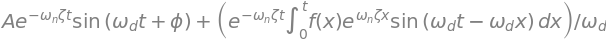

In [25]:
# Definição da forma geral da solução:
a = Symbol('A')
omgn = Symbol('\omega_n')
omgd = Symbol('\omega_d')
phi = Symbol('\phi')
x = Symbol('x')
f = Function('f')(x)
z = Symbol('\zeta')
t = Symbol('t')

# Resposta amortecida:
damped = (a*exp(-z*omgn*t)*sin((omgd*t)+phi))

# Método Heurístico para resolução da integral indefinida e teorema fundamental do cálculo:
def itg(fun, a, b):
    expression = heurisch(fun, x)
    return simplify(expression.subs(x, b) - expression.subs(x, a))

# Resposta forçada:
def forced(function=None):
    if (function == None):
        return ((1/omgd)*exp(-z*omgn*t)*integrate((f*exp(z*omgn*x)*sin(omgd*t-omgd*x)), (x, 0, t)))
    else:
        return ((1/omgd)*exp(-z*omgn*t)*itg((function*exp(z*omgn*x)*sin(omgd*t-omgd*x)).subs([(a, A[i]), (omgn, omega_n[i]), (phi, PHI[i]), (omgd, omega_d[i]), (z, Z[i])]), 0, t))


(damped+forced())

In [26]:
# Substituição das respectivas constantes em suas iterações:
RT = []
for i in range(len(omega_n)):
    ri = (damped+forced(PI[i])).subs([(a, A[i]), (omgn, omega_n[i]), (phi, PHI[i]), (omgd, omega_d[i]), (z, Z[i])]).doit()
    RT.append(trigsimp(arredNUM(ri)))  # Simplificação trigonométrica

Matrix(RT)

⎡        -12.7052⋅t                        ⎤
⎢1.6781⋅ℯ          ⋅sin(53.7893⋅t + 1.3448)⎥
⎢                                          ⎥
⎢         -1.6948⋅t                        ⎥
⎣ 2.1299⋅ℯ         ⋅sin(8.7036⋅t + 1.3819) ⎦

### Tempos de acomodação (critério 2%): $$ST = \frac{4}{\zeta\omega_n}$$

In [27]:
ultim_time = 0
for i in range(len(omega_n)):
    if (Z[i]):
        current = (4/(Z[i]*omega_n[i]))
        if (current > ultim_time):
            ultim_time = np.ceil(current*1.5)
        print(f'ST{i+1} = {round(current, 2)} s')
    else:
        print(f'ST{i+1} = {np.Infinity}')

ST1 = 0.31 s
ST2 = 2.36 s


### Respostas desacopladas:

In [28]:
# Criando matriz de posição em função do tempo:
R = []
for i in RT:
    fx = lambdify(t, i, 'numpy')
    R.append(fx(time))

### Retornando ao domínio físico:

In [29]:
XT = arredNUM(trigsimp(Matrix(S@RT)))

Matrix(XT)

⎡         -12.7052⋅t                                   -1.6948⋅t              
⎢ 0.1933⋅ℯ          ⋅sin(53.7893⋅t + 1.3448) + 0.0173⋅ℯ         ⋅sin(8.7036⋅t 
⎢                                                                             
⎢          -12.7052⋅t                                   -1.6948⋅t             
⎣- 0.0061⋅ℯ          ⋅sin(53.7893⋅t + 1.3448) + 0.1097⋅ℯ         ⋅sin(8.7036⋅t

          ⎤
+ 1.3819) ⎥
          ⎥
          ⎥
 + 1.3819)⎦

### Resposta temporal:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


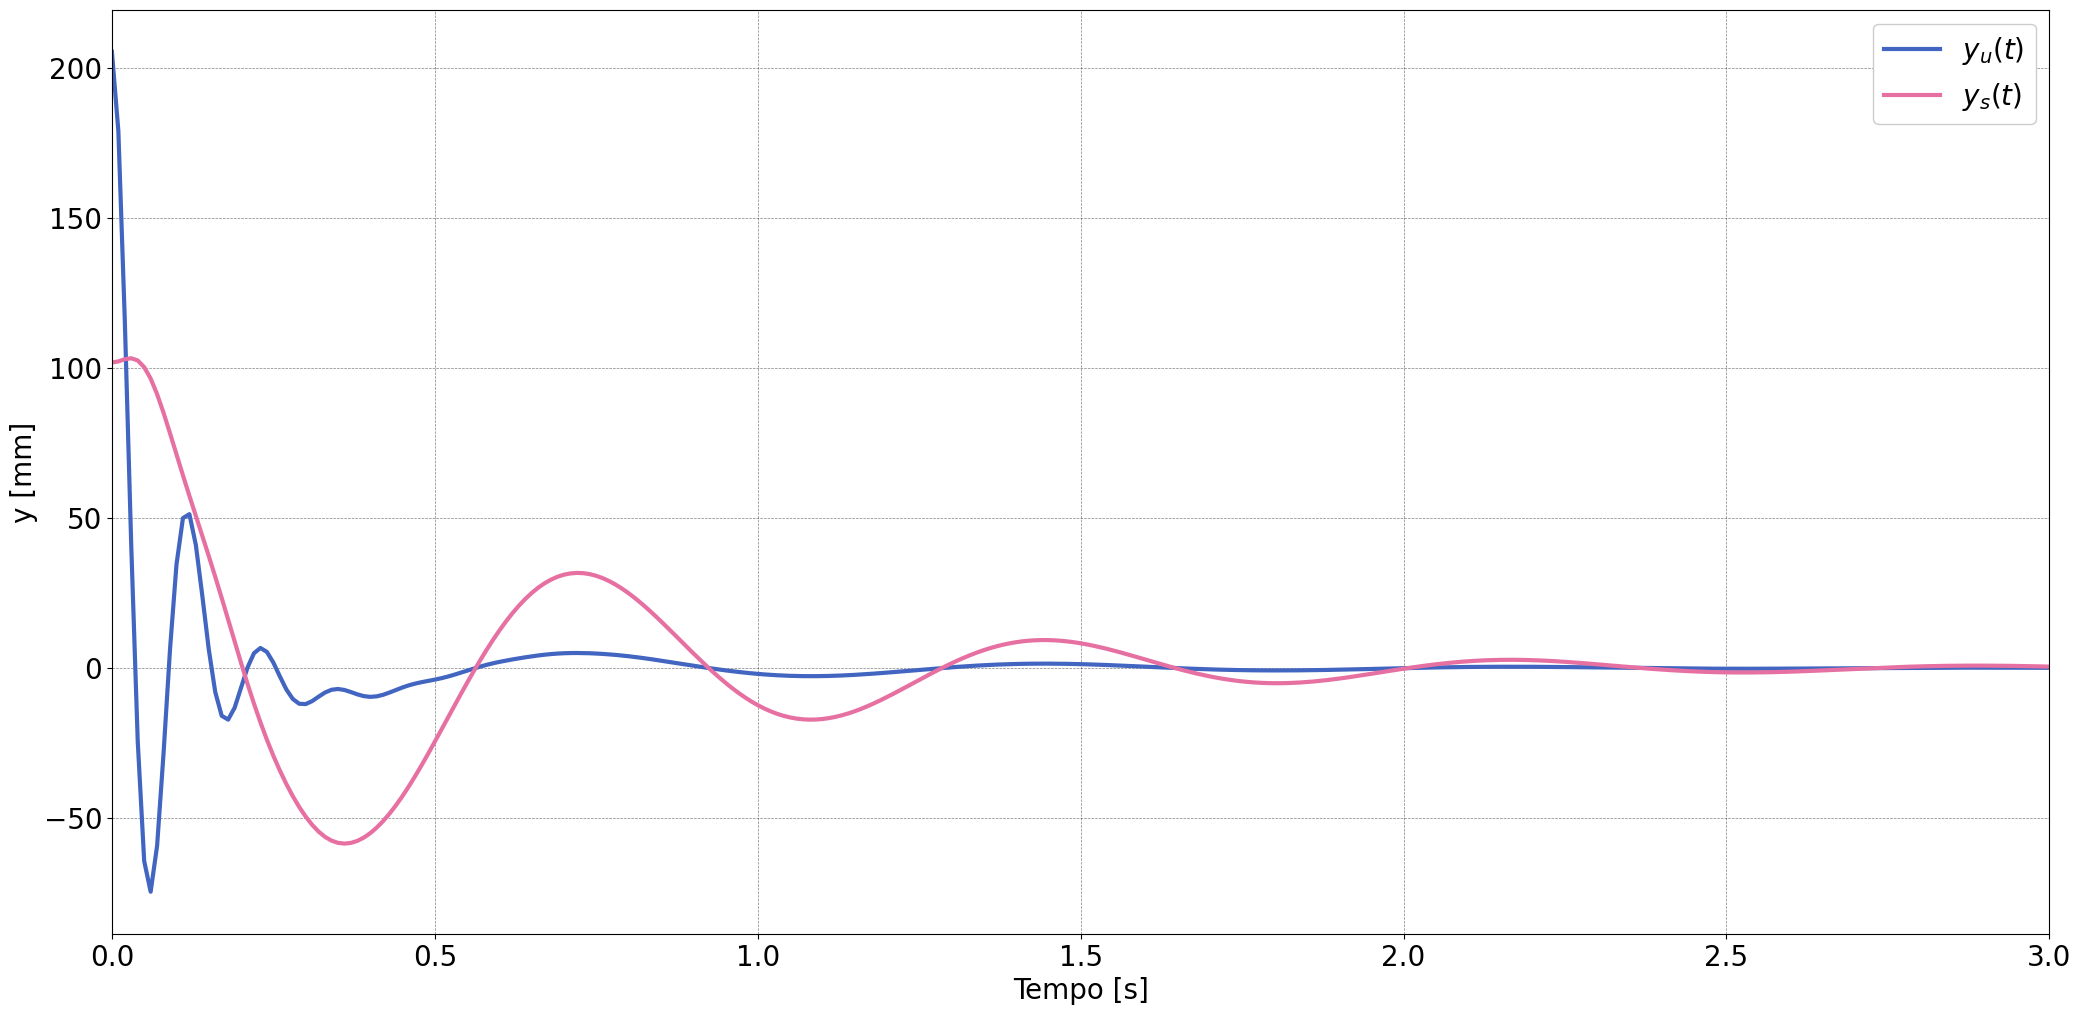

In [36]:
# Criando matriz de posição em função do tempo:
X = []
for i in XT:
    fx = lambdify(t, i, 'numpy')
    X.append(fx(time))

plt.rcParams['figure.figsize'] = (25, 12)
plt.figure(len(omega_n)+2)
labels = ['$y_u(t)$', '$y_s(t)$']
for i in range(len(X)):
    plt.plot(time, (X[i]*1e3), label=labels[i])
plt.ylabel('y [mm]')
plt.legend()
plt.xlabel('Tempo [s]')
plt.xlim(0, tf)
if(title):
    plt.title('Resposta Temporal Real')

plt.savefig('curves/TR2_MA.eps', dpi=600, transparent=True, bbox_inches='tight')

### Frequências naturais, em Hertz:

In [31]:
labels = ['u', 's']
for i in range(len(omega_n)):
    print(f'f{labels[i]} = {round((omega_n[i]/(2*np.pi)), 4)} Hz')

fu = 8.7964 Hz
fs = 1.4112 Hz


### Resposta em frequência:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


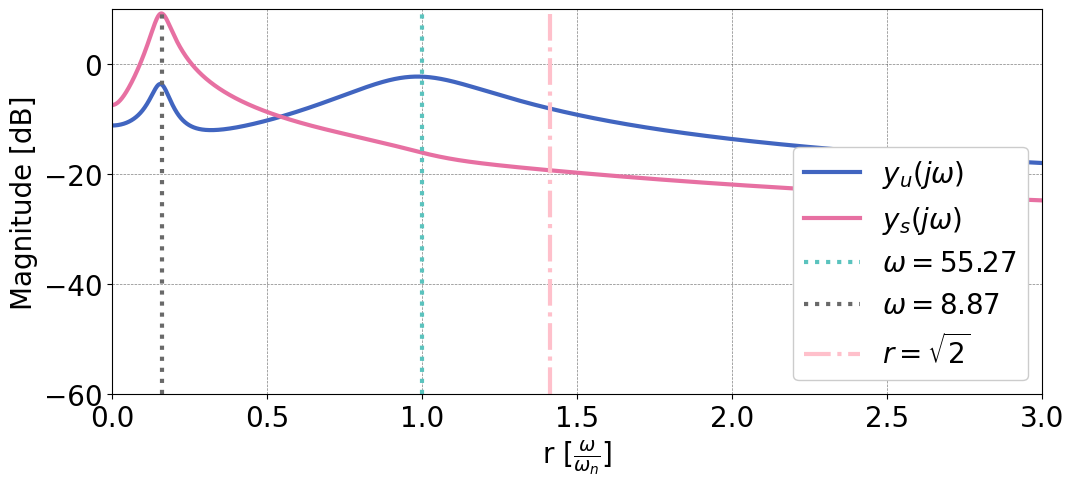

In [35]:
def mag2db(mag):
    return (20*np.log10(mag))

# Preparando as transformadas de Fourier:
def fft(sig, ts):
    freq = (np.fft.fftfreq(len(sig), ts)*2*np.pi)
    amp = mag2db(np.fft.fft(sig)[freq>0])
    phase = np.rad2deg(np.angle(np.fft.fft(sig)[freq>0]))
    freq = freq[freq>0]

    return freq, amp, phase

ffts = []
for i in X:
    ffts.append(fft(i, ts))

maxfreq = np.max(omega_n)

# Pltotando: Amplitude em função de frequência
plt.rcParams['figure.figsize'] = (12, 5)
plt.figure()
labels = ['$y_u(j\omega)$', '$y_s(j\omega)$']
for i in range(len(ffts)):
    plt.plot((ffts[i][0]/maxfreq), ffts[i][1]-1.5, label=labels[i])
for i in range(len(ffts)):
    plt.plot((omega_n[i]/maxfreq, omega_n[i]/maxfreq), (-60, 10), linestyle='dotted', label=f'$\omega = {omega_n[i]:.2f}$')
plt.plot((np.sqrt(2), np.sqrt(2)), (-60, 10), color='pink', linestyle='-.', label='$r = \sqrt{2}$')
plt.ylabel('Magnitude [dB]')
plt.legend(loc='lower right')
plt.xlabel('r $[\\frac{\omega}{\omega_n}]$')
plt.xlim(0, 3)
plt.ylim(-60, 10)
if(title):
    plt.title('Resposta em Frequência')
plt.savefig('curves/FR_MA.eps', dpi=600, transparent=True, bbox_inches='tight')